In [1]:
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jiarong/research/postprocessing/jupyter_notebook/functions/')
from style import set_style

0.00036989795918367346
Linear point


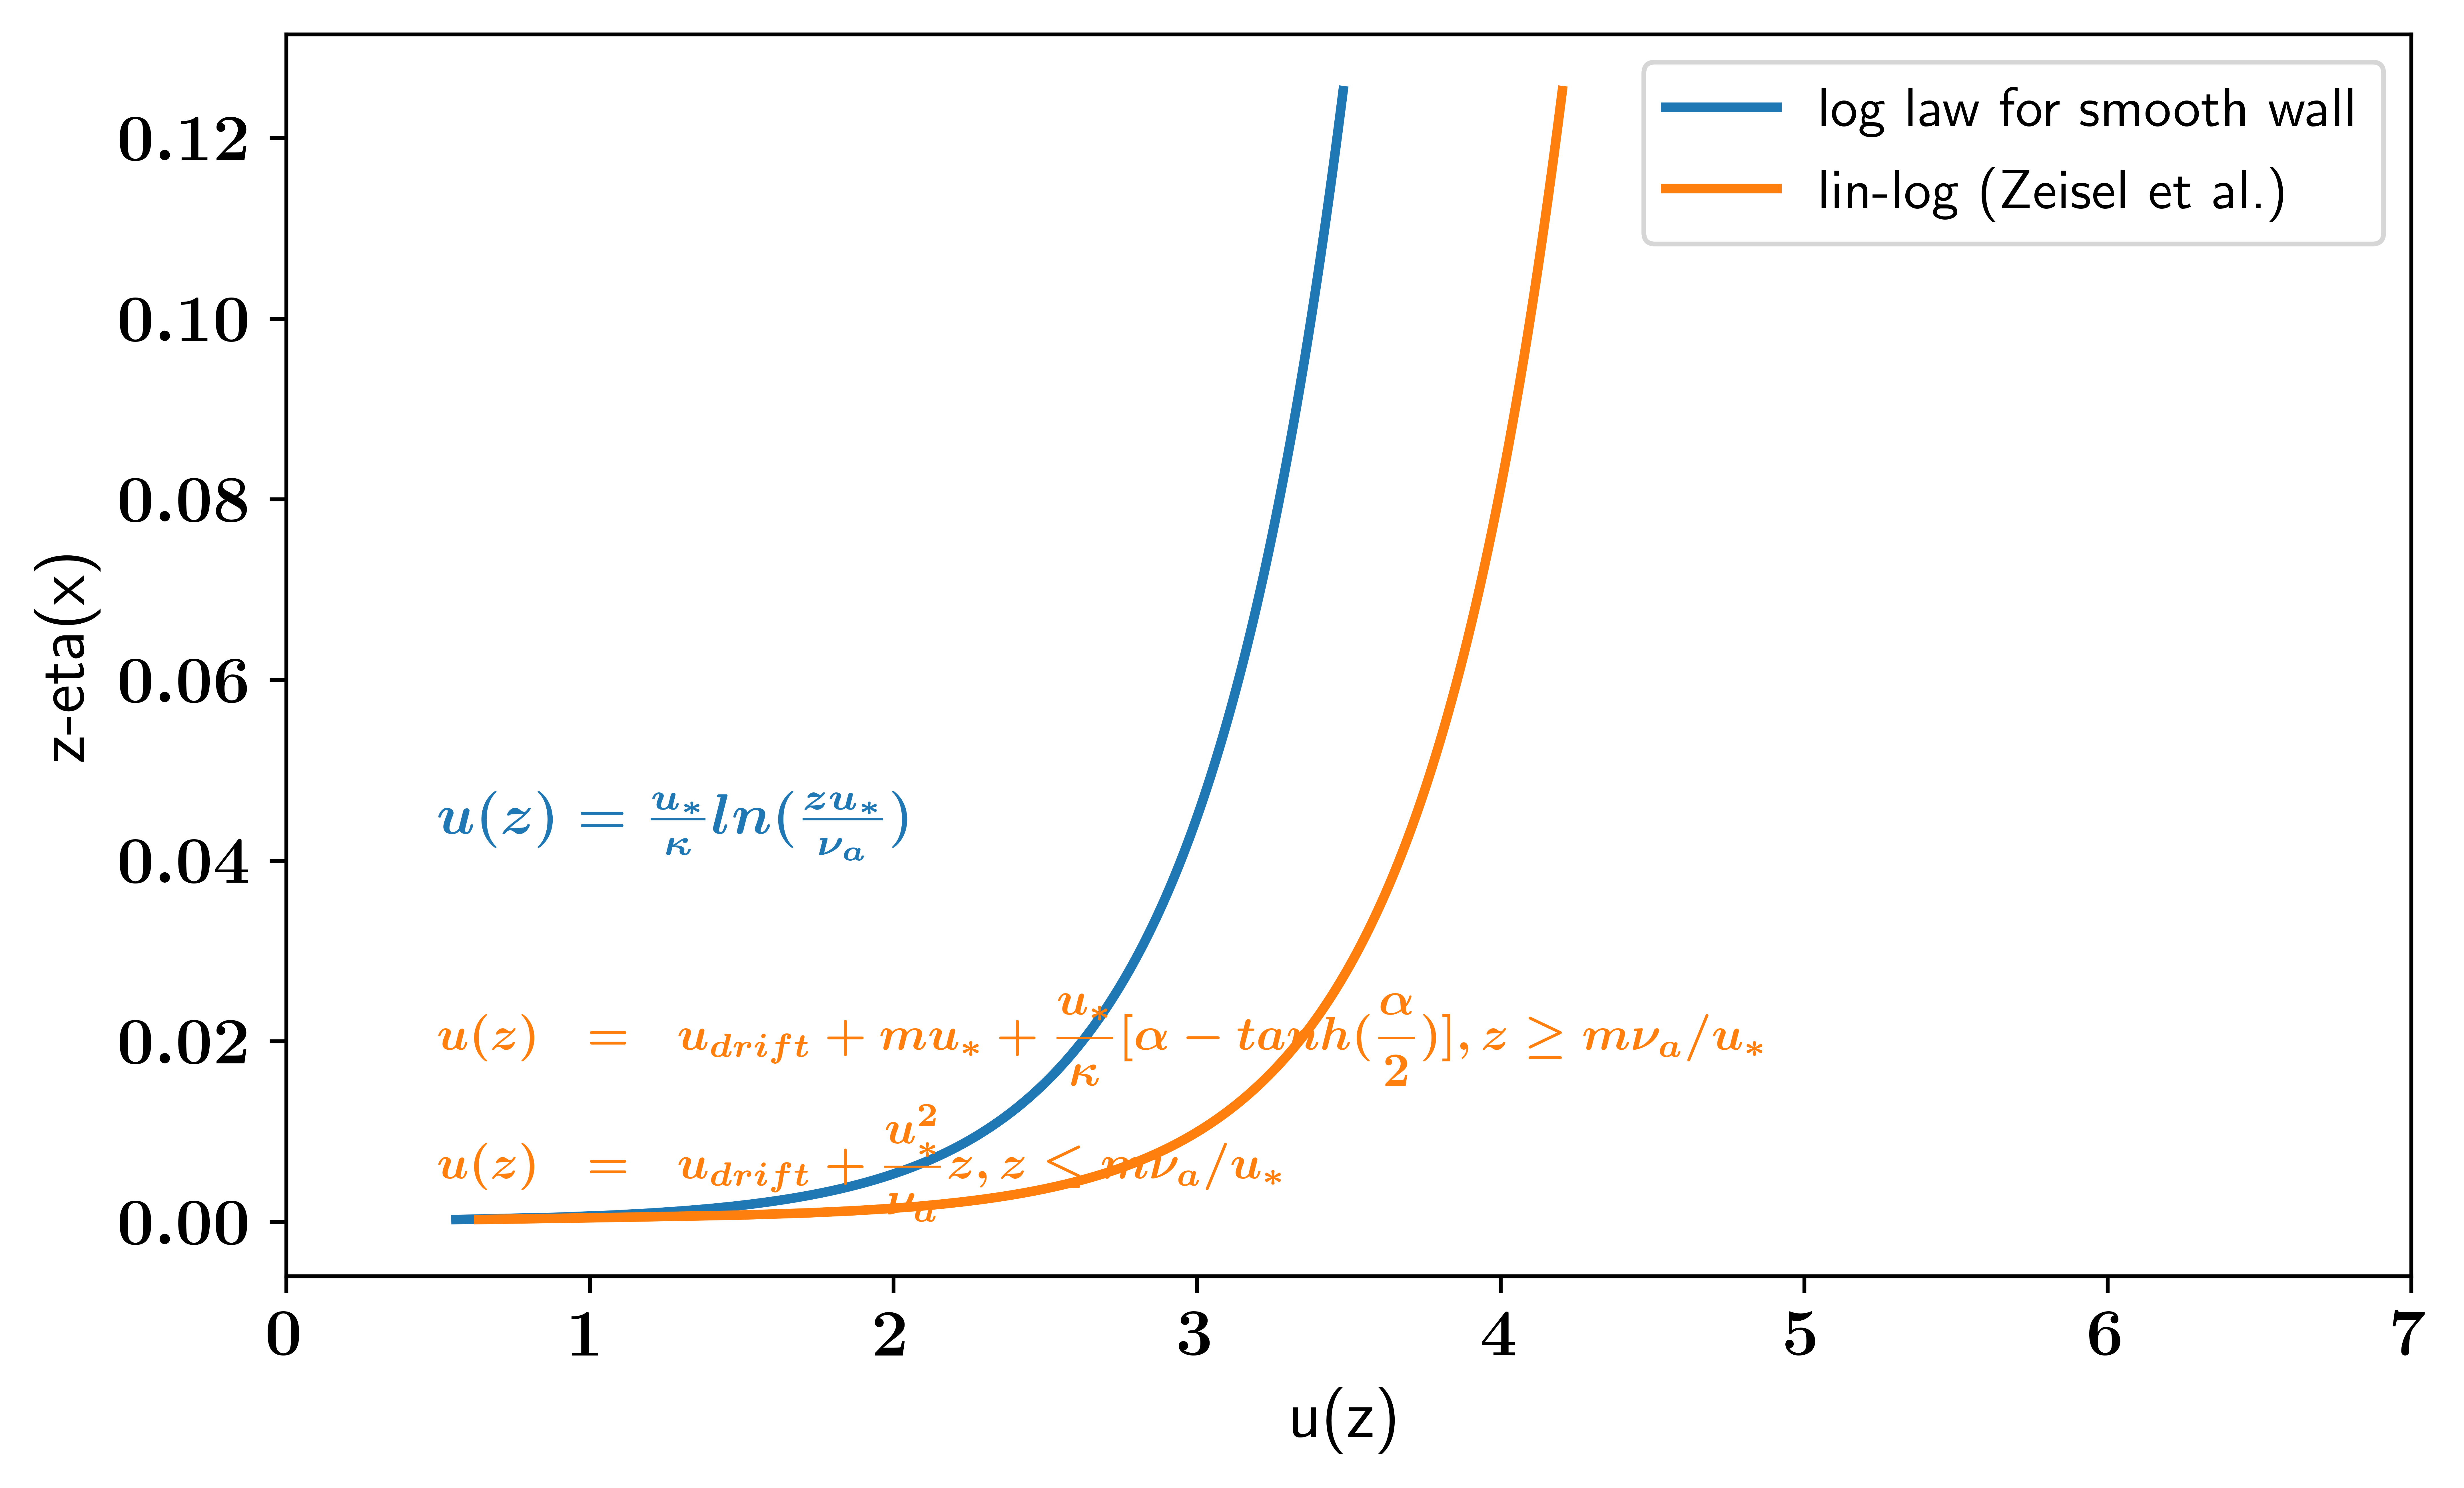

In [2]:
#stretch of initial field
set_style()
N = 512; h = 0.125
Udrift = 0
m = 5
y = np.linspace(0,h,N+1)+h/N
u_log = np.zeros(y.size)
u_quad = np.zeros(y.size)
u_linlog = np.zeros(y.size)
nu2 = 17.4e-6/1.225
ustar = 0.6*0.32
delta = m*nu2/ustar
print(delta)
u_log = 1/0.41*ustar*np.log(y*ustar/nu2)
# u_log = 1/0.41*ustar*np.log(y*Ustar/nu2*20)
u_quad = ustar**2*h/nu2*(1-((y-h)/h)**2)
for i in range(0,y.size):
    if y[i] < delta:
        u_linlog[i] = Udrift + ustar**2/nu2*y[i]
        print("Linear point")
    else:
        beta = 2*0.41*ustar/nu2*(y[i]-delta)
        alpha = math.asinh(beta)
        u_linlog[i] = (Udrift + m*ustar + ustar/0.41*(alpha-math.tanh(alpha)))    

plt.plot(u_log, y, label = 'log law for smooth wall')
plt.plot(u_linlog, y, label = 'lin-log (Zeisel et al.)')
# plt.plot(u_quad, y, label = 'quadratic laminar channel')
# plt.yscale('log')

# for i in (0, 1, 2, 3):
#     u_air, u_water = fields(i)
#     u_air_1D = np.average(u_air, axis=0)
#     z = np.linspace(0,h,256)
#     plt.plot(u_air_1D[256:], z, label = 't = %g' %i)
plt.xlim([0, 7])
plt.text(0.5,0.04,r'$u(z) = \frac{u_*}{\kappa}ln(\frac{zu_*}{\nu_a})$', fontsize=12, color='C0')
eq1 = r"\begin{eqnarray*}" + \
      r'u(z) &=& u_{drift} + mu_{*} + \frac{u_*}{\kappa}[\alpha-tanh(\frac{\alpha}{2})], z\geq m\nu_a/u_* \\' + \
      r'u(z) &=& u_{drift} + \frac{u_{*}^2}{\nu_{a}}z, z\leq m\nu_a/u_* ' + \
      r"\end{eqnarray*}"
plt.text(0.5,0,eq1,fontsize=10,color='C1')
plt.xlabel('u(z)'); plt.ylabel('z-eta(x)')
plt.legend()